## DecisionTree_practice

### Data load
+ sklearn data는 dictionary형태로 data와 target으로 나뉘어져 있다.

In [25]:
from sklearn import datasets
data = datasets.load_breast_cancer()
print(data.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [23]:
import pandas as pd
x=data['data']
x=pd.DataFrame.from_dict(x)
x

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [22]:
y=data['target']
y=pd.DataFrame.from_dict(y)
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


입력받은 데이터를 X,Y로 구분하여 처리한다. x 데이터의 형태를 확인하기 위해 아래와 같이 진행한다

In [26]:
x = data['data']
y = data['target']
print(x.shape)

(569, 30)


### 데이터 분할
3:7로 test, train data 분할

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((398, 30), (171, 30), (398,), (171,))

### Training Model

In [29]:
from sklearn.tree import DecisionTreeClassifier

scikit-learn에서의 모델 트레이닝은 간단. 아래와 같이 특정 모델의 객체를 생성 한 후, 각 객체에 공통적으로 존재하는 fit함수를 사용하여 주어진 데이터에 대해서 학습을 진행한다.

In [30]:
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

모델이 얼마나 fitting이 되었는지 confusion matrix와 accuracy로 확인한다.

+ confusion matrix: 타겟의 원래 클래스와 모형이 예측한 클래스가 일치하는지는 갯수로 센 결과를 표나 나타낸 것이다. 정답 클래스는 행(row)으로 예측한 클래스는 열(column)로 나타낸다.

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [32]:
confusion_matrix(Y_train, tree.predict(X_train))

array([[149,   0],
       [  0, 249]], dtype=int64)

In [33]:
print(accuracy_score(Y_train, tree.predict(X_train)))

1.0


train data 데하여 정확도가 1!?!?!?

In [34]:
confusion_matrix(Y_test, tree.predict(X_test))

array([[60,  3],
       [11, 97]], dtype=int64)

In [35]:
print(accuracy_score(Y_test, tree.predict(X_test)))

0.9181286549707602


현재 트레이닝이 되어있는 것을 보면 학습 데이터에 대해 정확도가 1이다. 이는 학습 데이터에 대해 과적합되어있다는 의미이다. 왜 이런가..?

이는, 우리가 사용한 decision tree의 파라미터 세팅을 보면 확인 할 수 있다. 현재 아무런 세팅을 하지 않고 진행을 했으므로 모두 default로 설정이 되어있고, 그렇다면 이렇게 과적합이 일어난 이유는 어떤것인지 확인할 필요가 있다.

max_depth : int or None, optional (default=None)

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
파라미터 중 max_depth 옵션을 보면 특정 값으로 설정하지 않을 경우 모든 잎이 pure해질 때까지 분기를 하는 것이다. 즉, 앞서 개념에서 배운 가지치기가 되어있지 않은 형태이다. 이와 밀접히 관련된 또하나의 파라미터는 min_samples_leaf이다.

min_samples_leaf : int, float, optional (default=1)

The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
즉, 우리는 다른 파라미터 뿐만아니라 이 두 가지 파라미터에 대해서 신경써서 학습을 진행해줘야한다.

In [36]:
tree_pruned = DecisionTreeClassifier(max_depth=4, min_samples_leaf=3)
tree_pruned.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [44]:
confusion_matrix(Y_train, tree_pruned.predict(X_train))

array([[141,   8],
       [  1, 248]], dtype=int64)

In [46]:
print(accuracy_score(Y_train, tree_pruned.predict(X_train)))

0.9773869346733668


In [47]:
confusion_matrix(Y_test, tree_pruned.predict(X_test))

array([[ 59,   4],
       [  3, 105]], dtype=int64)

In [48]:
print(accuracy_score(Y_test, tree_pruned.predict(X_test)))

0.9590643274853801


위의 결과와 같이 max_depth=4, min_samples_leaf=3으로 한 결과 train data에 대한 정확도는 떨어졌지만
test data에 관한 정확도는 올라간 것을 확인할 수 있다.--> 좀 더 일반화가 진행된 트리 모델

추가로, 트리 알고리즘을 활용했을 경우, 모델에서 각 변수 별 가중치 및 중요도를 확인 할 수 있다. 이는 모델의 속성값인 feature importance 를 이용한다. 이러한 feature importance를 이용하여 트리를 통해 주요 변수를 추출 할 수도 있다.

In [49]:
print(tree_pruned.feature_importances_)

[0.         0.02321003 0.00377399 0.         0.         0.
 0.         0.0102927  0.         0.         0.         0.
 0.         0.0513779  0.         0.         0.         0.
 0.         0.         0.         0.01856803 0.         0.09319857
 0.         0.         0.01190258 0.78767619 0.         0.        ]


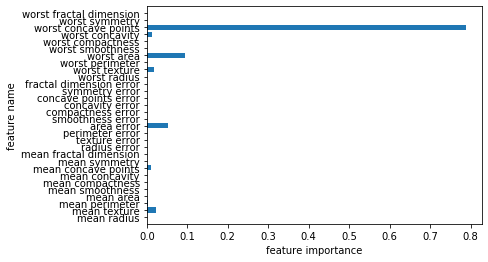

In [55]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

n_features = X_train.shape[1]
plt.barh(range(n_features), tree_pruned.feature_importances_, align='center')
plt.yticks(np.arange(n_features), data.feature_names)
plt.xlabel("feature importance")
plt.ylabel("feature name")
plt.ylim(-1, n_features) #ylim은 y축의 최소 ~ 최대값 범위를 지정
plt.show()